In [1]:
## Arrhenius Equation and Plot

Sample k values:
T = 300 K: k = 1.97e+01 s^-1
T = 400 K: k = 3.07e+03 s^-1
T = 500 K: k = 5.98e+04 s^-1
Temperature for k = 1.00e-02 s^-1: 217.65 K


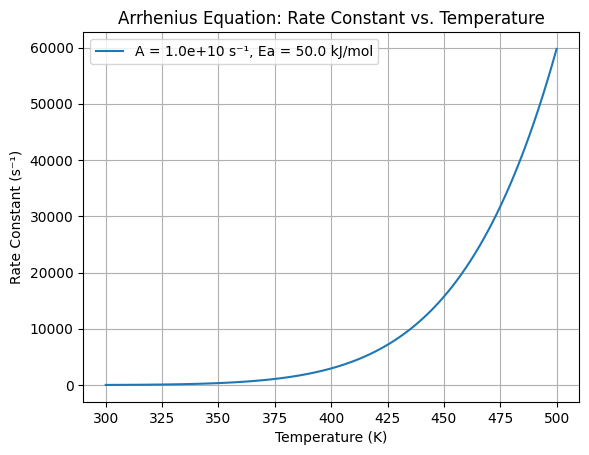

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def arrhenius(A, Ea, T, R=8.314):
    """
    Calculate rate constant using the standard form of the Arrhenius equation.
    
    Parameters:
    A (float): Pre-exponential factor (e.g., s^-1 for first-order reactions)
    Ea (float): Activation energy (J/mol)
    T (float or array): Temperature (K)
    R (float): Gas constant (J/mol·K), default = 8.314
    
    Returns:
    k (float or array): Rate constant (units depend on A, e.g., s^-1)
    """
    return A * np.exp(-Ea / (R * T))

def arrhenius_solve_T(k, A, Ea, R=8.314):
    """
    Solve for temperature T given rate constant k using logarithmic form.
    
    Parameters:
    k (float): Rate constant (e.g., s^-1)
    A (float): Pre-exponential factor (e.g., s^-1)
    Ea (float): Activation energy (J/mol)
    R (float): Gas constant (J/mol·K), default = 8.314
    
    Returns:
    T (float): Temperature (K)
    """
    if k <= 0 or A <= 0:
        raise ValueError("k and A must be positive")
    return Ea / (R * np.log(A / k))

# Parameters
A = 1e10  # s^-1 (pre-exponential factor for a first-order reaction)
Ea = 50000  # J/mol (activation energy, equivalent to 50 kJ/mol)
T = np.linspace(300, 500, 100)  # 100 temperatures from 300 to 500 K
R = 8.314  # J/mol·K (gas constant)

# Compute rate constant k
k = arrhenius(A, Ea, T)

# Check a few k values to confirm exponential behavior
print("Sample k values:")
print(f"T = 300 K: k = {k[0]:.2e} s^-1")
print(f"T = 400 K: k = {k[50]:.2e} s^-1")  # Approximate midpoint
print(f"T = 500 K: k = {k[-1]:.2e} s^-1")

# Solve for T given a target k
target_k = 0.01  # s^-1
try:
    T_solved = arrhenius_solve_T(target_k, A, Ea)
    print(f"Temperature for k = {target_k:.2e} s^-1: {T_solved:.2f} K")
except ValueError as e:
    print(f"Error: {e}")

# Plot k vs. T
plt.plot(T, k, label=f'A = {A:.1e} s⁻¹, Ea = {Ea/1000:.1f} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('Rate Constant (s⁻¹)')
plt.title('Arrhenius Equation: Rate Constant vs. Temperature')
plt.grid(True)
plt.legend()
plt.show()



    
    
    